# 회귀모델 유형 실습

### 라이브러리 선언

In [1]:
import pandas as pd
import numpy as np

# 모델 라이브러리 선언
from sklearn import tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")

### (1) 타입통합 / 특성 숫자컬럼 추가

In [2]:
# 데이터 타입 통합
featuresData = featuresData.astype({"YEARWEEK":int,
                                    "YEAR":int,
                                    "WEEK":int})

### 특성숫자변환: np.where 방식

In [3]:
# 특성 숫자컬럼 추가
featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y", 1,0)
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


### 특성숫자변환: label 인코더 방식

In [4]:
from sklearn.preprocessing import LabelEncoder
# 인코딩 수행
le_ho = LabelEncoder() 
le_pro = LabelEncoder()
featuresData["HO_YN"] = \
            le_ho.fit_transform(featuresData.HOLIDAY)
featuresData["PRO_YN"] = \
            le_pro.fit_transform(featuresData.PROMOTION)

# 다시 인코딩된 내용을 디코딩 후 기존값과 비교
featuresData["HO_DECO"] = \
            le_ho.inverse_transform(featuresData.HO_YN)
featuresData["PRO_DECO"] = \
            le_pro.inverse_transform(featuresData.PRO_YN)

In [5]:
featuresData.drop(columns=["HO_DECO","PRO_DECO"],inplace=True)

### 특성숫자변환: 딕셔너리 활용

In [6]:
binarymap = {"Y":1, "N":0}

featuresData["HO_YN"] = featuresData.HOLIDAY.map(binarymap)
featuresData["PRO_YN"] = featuresData.PROMOTION.map(binarymap)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1


### 특성숫자변환: get dummies

In [7]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'HO_YN',
       'PRO_YN'],
      dtype='object')

In [8]:
featuresData = pd.concat( [ featuresData,
             pd.get_dummies(prefix="PROMO_DU",\
                          data = featuresData.PROMOTION)],
          axis=1   )

In [9]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'HO_YN',
       'PRO_YN', 'PROMO_DU_N', 'PROMO_DU_Y'],
      dtype='object')

In [10]:
len(featuresData)

105

In [11]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PROMO_DU_N,PROMO_DU_Y
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1,0,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1,0,1


In [12]:
featuresData.drop(columns=["PROMO_DU_Y","PROMO_DU_N"], inplace=True)

In [13]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'HO_YN',
       'PRO_YN'],
      dtype='object')

### (2) 특성선정 / 데이터 분리

In [14]:
corrDf = featuresData.corr(method="pearson")
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [15]:
# 상관관계 확인
corrdf = featuresData.corr()
corrdf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [16]:
# 상관관계 계수 비율 선정
featuresStd = 0.5 

# 특성 추출
features = list( corrDf.loc[ ( abs( corrDf.QTY ) > featuresStd ) & 
                       ( abs( corrDf.QTY ) != 1) ].index )
print(features)

# 정답지 추출
label = ['QTY'] 
print(label)

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']
['QTY']


In [17]:
# 데이터 분리
yearweekStd = 201630

# 훈련 데이터
trainingData_features = \
    featuresData.loc[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = \
    featuresData.loc[featuresData.YEARWEEK <= yearweekStd][label]
# 테스트 데이터
testData_features = \
    featuresData.loc[featuresData.YEARWEEK > yearweekStd][features]
testData_label = \
    featuresData.loc[featuresData.YEARWEEK > yearweekStd]
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(83, 4)
(83, 1)
(22, 4)
(22, 14)


### (3) 모델 적용

In [18]:
from sklearn import linear_model

In [19]:
from sklearn import ensemble

In [20]:
# 모델 정의
model_method_dt = \
    tree.DecisionTreeRegressor(random_state=1)
model_method_lr = \
    linear_model.LinearRegression()
model_method_rf = \
    ensemble.RandomForestRegressor(random_state=1)

# 머신 러닝 (훈련데이터 특성/답지)
model_dt = model_method_dt.fit(X=trainingData_features, 
                         y=trainingData_label)
model_lr = model_method_lr.fit(X=trainingData_features, 
                         y=trainingData_label)
model_rf = model_method_rf.fit(X=trainingData_features, 
                         y=trainingData_label)

C:\Users\kopo\AppData\Local\Temp/ipykernel_19072/3196128387.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_method_rf.fit(X=trainingData_features,


In [21]:
model_lr.intercept_

array([422.79876733])

In [22]:
model_lr.coef_

array([[ -30.59196299, 6172.02285588,  327.06456592, -618.89495949]])

In [23]:
from sklearn.tree import export_graphviz
import graphviz

In [24]:
# 아래와 동일
# dot_data = export_graphviz(decision_tree=modelCoeff,
#                            rounded=True)
# graph = graphviz.Source(dot_data, format="png")
# graph

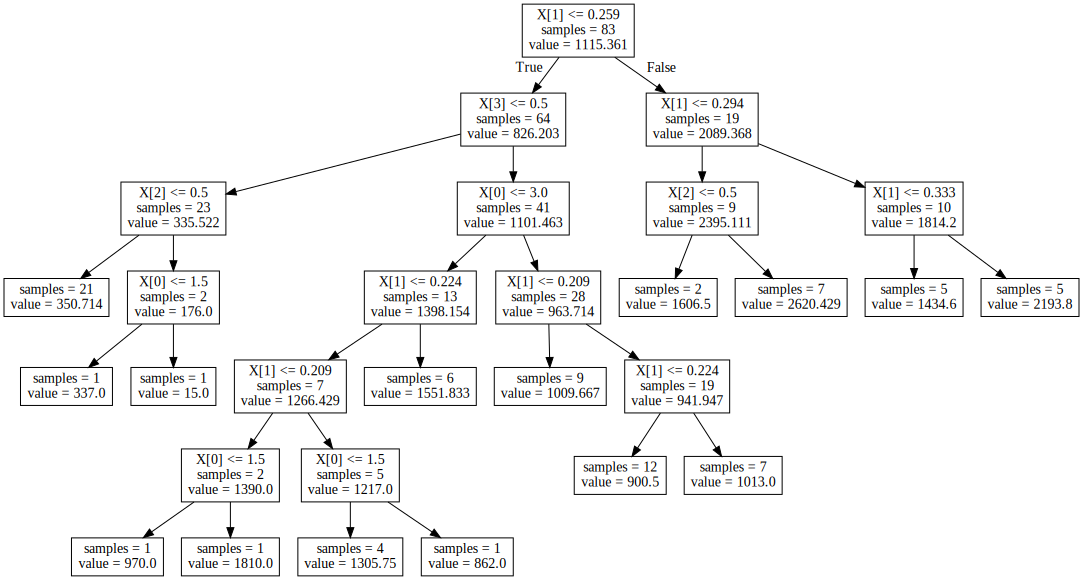

In [26]:
export_graphviz(decision_tree=model_dt,
               out_file="tree.dot",
               impurity=False)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

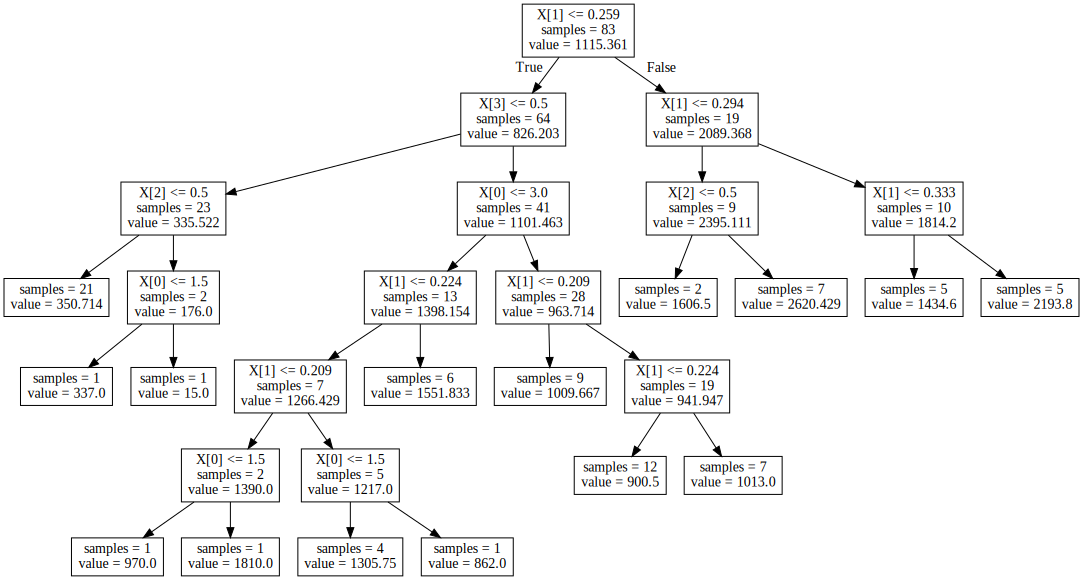

In [27]:
export_graphviz(decision_tree=model_rf.estimators_[0],
               out_file="tree.dot",
               impurity=False)

with open("tree.dot") as f:
    dot_graph_praph = f.read()
display(graphviz.Source(dot_graph))

### (4) 예측

In [28]:
predict_dt = model_dt.predict( X = testData_features)
predict_dt

array([1606.5       , 1606.5       ,  350.71428571, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       1606.5       , 1606.5       , 2620.42857143, 1606.5       ,
        350.71428571, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       ])

In [29]:
predict_lr = model_lr.predict( X = testData_features)
predict_lr

array([[1411.29171929],
       [1411.29171929],
       [ 300.43091536],
       [2004.96200456],
       [2004.96200456],
       [2004.96200456],
       [1586.12154967],
       [1586.12154967],
       [1411.29171929],
       [1411.29171929],
       [1799.54021119],
       [1411.29171929],
       [ 300.43091536],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2285.44087736],
       [1856.31310796],
       [1856.31310796],
       [2275.15356285]])

In [30]:
predict_rf = model_rf.predict( X = testData_features)
predict_rf

array([1610.53313528, 1610.53313528,  357.63822709, 1465.43265945,
       1465.43265945, 1465.43265945, 1341.20791667, 1341.20791667,
       1610.53313528, 1610.53313528, 2346.67025685, 1610.53313528,
        357.63822709, 2177.87920707, 2177.87920707, 2177.87920707,
       2177.87920707, 2177.87920707, 1540.84088889, 1540.84088889,
       1540.84088889, 1805.20725866])

#  5. 데이터 정리

In [31]:
import warnings

In [32]:
warnings.filterwarnings(action="ignore")

In [33]:
testData_label["PREDICT_DT"] = predict_dt
testData_label["PREDICT_LR"] = predict_lr
testData_label["PREDICT_RF"] = predict_rf

In [34]:
testData_label.head(5)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT_DT,PREDICT_LR,PREDICT_RF
83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000,1411.291719,1610.533135
84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000,1411.291719,1610.533135
85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286,300.430915,357.638227
86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000,2004.962005,1465.432659
87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000,2004.962005,1465.432659


In [35]:
# MAE 지표
pMae_DT = mean_absolute_error(y_true = testData_label['QTY'], 
                           y_pred = testData_label['PREDICT_DT'])  

pMae_LR = mean_absolute_error(y_true = testData_label['QTY'], 
                           y_pred = testData_label['PREDICT_LR'])  
pMae_RF = mean_absolute_error(y_true = testData_label['QTY'], 
                           y_pred = testData_label['PREDICT_RF'])  

In [36]:
print("DT: {} LR: {} RF: {}".format(pMae_DT, pMae_LR, pMae_RF))

DT: 460.25259740259736 LR: 566.6172394760974 RF: 397.4679501673299


In [37]:
pMae_DT

460.25259740259736

In [38]:
pMae_LR

566.6172394760974

In [39]:
pMae_RF

397.4679501673299